**<h2 style="text-align: center; color:#FF0000;">CLUSTERING BY EVENT ACTION</h2>**

#### **Neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import ollama
from IPython.display import Markdown, display
import warnings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

## **Login**

### **Read & explore data**

In [2]:
df_login=pd.read_csv("../EDA_transform/data/login_transform.csv")
df_login

,vopenid,duration,event,first_login_date,last_login_date,last_update_time,num_day_login,num_session_on_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,gold_first,gold_last,gold_net_per_login,gold_max,gold_min,gold_trend_strength,diamond_first,diamond_last,diamond_net_per_login,diamond_max,diamond_min,diamond_trend_strength,silkcoin_first,silkcoin_last,silkcoin_net_per_login,silkcoin_max,silkcoin_min,silkcoin_trend_strength,powerpoint_last_login,level_last_login,vip_last_login
0,2206111754266455,2,1,2025-05-07,2025-05-08,2025-05-08 11:08:20+00:00,2,1.00,1.02,2,48,10,12632.46,0.00,0.00,17865.00,0.00,0.00,0,17865,8932.50,17865,0,1.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,29366,9,0
1,2206111758351763,1,1,2025-05-26,2025-05-26,2025-05-26 05:07:07+00:00,1,1.00,0.00,1,31,5,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,25359,1,0
2,2206111808105074,2,1,2025-06-15,2025-06-16,2025-06-16 02:01:16+00:00,2,3.00,0.09,2,10,1,191511.83,0.41,0.00,61253.34,-0.14,0.00,209227,402578,32225.17,402578,0,0.47,1,0,-0.17,1,0,-0.58,0,0,0.00,0,0,0.00,74275,21,0
3,2206111830413361,54,0,2025-05-03,2025-06-25,2025-06-25 22:51:51+00:00,51,3.37,0.31,37,0,22,7919629.34,0.00,23.41,-105694.23,0.00,-0.22,14781773,315096,-84108.59,22040256,0,-0.15,0,0,0.00,0,0,0.00,40,0,-0.23,66,0,-0.11,303140,31,0
4,2206111904162575,1,1,2025-05-20,2025-05-20,2025-05-20 01:58:44+00:00,1,1.00,0.00,1,37,1,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,24938,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217067,lkeu,7,1,2025-06-12,2025-06-18,2025-06-18 06:40:34+00:00,2,1.00,5.95,1,8,6,3558.87,0.00,0.00,5033.00,0.00,0.00,0,5033,2516.50,5033,0,1.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,24218,3,0
217068,lknew,16,1,2025-05-28,2025-06-12,2025-06-12 04:50:52+00:00,2,2.00,4.97,1,14,3,4839.08,0.00,0.00,2800.00,0.00,0.00,793753,803253,2375.00,803753,793753,0.18,0,0,0.00,0,0,0.00,4,4,0.00,4,4,0.00,479146,36,0
217069,tri3,1,1,2025-06-16,2025-06-16,2025-06-16 08:20:13+00:00,1,2.00,0.10,1,9,5,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,26467,1,0
217070,vtvinh,7,1,2025-06-11,2025-06-17,2025-06-17 07:10:48+00:00,3,3.00,0.75,2,8,6,186669.67,0.00,0.00,52153.97,0.00,0.00,0,428429,47603.22,436989,0,0.65,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0.00,106968,23,0


In [3]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217072 entries, 0 to 217071
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vopenid                  217072 non-null  object 
 1   duration                 217072 non-null  int64  
 2   event                    217072 non-null  int64  
 3   first_login_date         217072 non-null  object 
 4   last_login_date          217072 non-null  object 
 5   last_update_time         217072 non-null  object 
 6   num_day_login            217072 non-null  int64  
 7   num_session_on_day       217072 non-null  float64
 8   avg_between_login        217072 non-null  float64
 9   streak_login             217072 non-null  int64  
 10  last_since_from_login    217072 non-null  int64  
 11  popular_time_login       217072 non-null  int64  
 12  gold_std_login           217072 non-null  float64
 13  diamond_std_login        217072 non-null  float64
 14  silk

In [4]:
df_login.describe()

,duration,event,num_day_login,num_session_on_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,gold_first,gold_last,gold_net_per_login,gold_max,gold_min,gold_trend_strength,diamond_first,diamond_last,diamond_net_per_login,diamond_max,diamond_min,diamond_trend_strength,silkcoin_first,silkcoin_last,silkcoin_net_per_login,silkcoin_max,silkcoin_min,silkcoin_trend_strength,powerpoint_last_login,level_last_login,vip_last_login
count,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00,217072.00
mean,24.82,0.58,17.98,4.42,0.72,10.82,11.18,10.69,6874608.89,28.83,108.40,82018.88,0.40,0.03,7003198.94,21399698.06,73984.82,25883878.22,3772823.75,0.38,30.48,40.89,0.42,96.27,4.07,-0.03,122.97,121.48,0.03,475.51,22.89,0.06,2545393.08,32.14,0.26
std,21.47,0.49,17.77,6.04,2.05,13.32,14.79,6.09,32535936.19,79.06,762.49,1559410.18,6.56,43.77,40551458.72,104489171.01,961678.32,113004825.54,28009563.53,0.46,136.04,150.86,5.01,251.04,51.64,0.24,2414.01,1856.97,33.52,3824.12,1441.45,0.28,6730711.35,23.55,0.84
min,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-270112036.00,-1050.00,-5078.00,0.00,0.00,-135056018.00,0.00,0.00,-1.00,0.00,0.00,-525.00,0.00,0.00,-1.00,0.00,0.00,-5196.08,0.00,0.00,-1.00,22114.00,1.00,0.00
25%,3.00,0.00,2.00,1.63,0.11,2.00,0.00,6.00,27313.99,0.00,0.00,0.00,0.00,0.00,0.00,79602.75,0.00,212350.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29782.00,15.00,0.00
50%,17.00,1.00,11.00,3.00,0.26,5.00,2.00,12.00,203530.04,0.00,0.00,4592.17,0.00,0.00,15859.00,572655.00,4456.41,944611.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,135723.50,26.00,0.00
75%,51.00,1.00,33.00,5.56,0.60,15.00,19.00,15.00,1137053.52,0.00,66.48,39672.09,0.00,0.00,1547915.50,3678714.00,37167.59,6443826.75,356350.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,11.00,31.00,0.00,285.00,0.00,0.06,1897646.00,53.00,0.00
max,54.00,1.00,54.00,608.00,52.57,54.00,53.00,23.00,1815052659.00,3801.00,155710.73,216312396.00,751.00,7500.00,3895320411.00,6431870180.00,108156198.00,6431870180.00,2287297193.00,1.00,9808.00,9707.00,500.33,12734.00,4830.00,1.00,1002083.00,729512.00,5000.00,1130056.00,655856.00,1.00,61322069.00,90.00,3.00


In [5]:
numeric_fields = [
    "vip_last_login",
    "powerpoint_last_login",
    "level_last_login"
]

for col in numeric_fields:
    df_login[col] = pd.to_numeric(df_login[col], errors='coerce').fillna(-1.0)

df_login = df_login[~(df_login[numeric_fields] == -1.0).any(axis=1)]
df_login.reset_index(drop=True,inplace=True)

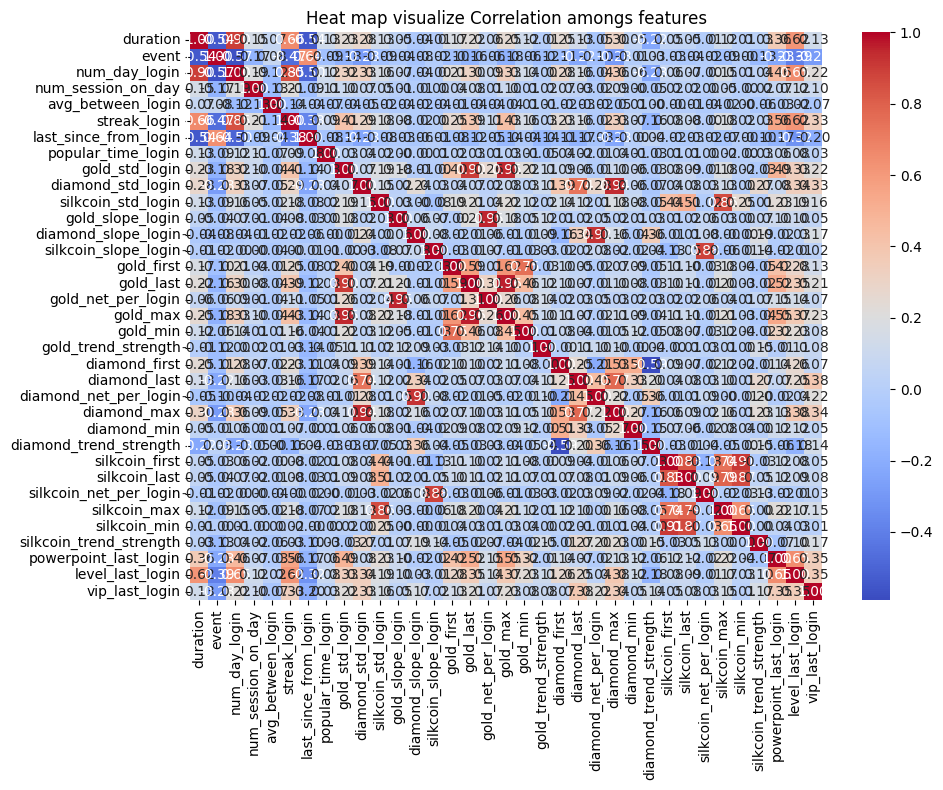

In [6]:
corr_cols = df_login.drop(columns=['vopenid','last_update_time','last_login_date','first_login_date']).columns

plt.figure(figsize=(10,8))
sns.heatmap(df_login[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

#### **Prepare data**

In [7]:
X = df_login.drop(columns=['vopenid', 'last_update_time','last_login_date','first_login_date'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
z_scores = pd.DataFrame(np.abs(zscore(X_scaled)), columns=X.columns)
outlier_mask = (z_scores > 5).any(axis=1)

In [9]:
num_cluster = 3
df_login['kmeans_cluster'] = -1
df_login['gmm_cluster'] = -1
df_login['agglo_cluster'] = -1
df_login['spec_cluster'] = -1

#### **Kmeans**

In [10]:
# inertia = []
# silhouette = []
# K_range = range(2, 11) 

# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = kmeans.fit_predict(X_scaled)
    
#     inertia.append(kmeans.inertia_)
#     silhouette.append(silhouette_score(X_scaled, labels))


# fig, ax1 = plt.subplots(figsize=(10, 5))
# color = 'tab:blue'
# ax1.set_xlabel('Number of Clusters (k)')
# ax1.set_ylabel('Inertia (Elbow)', color=color)
# ax1.plot(K_range, inertia, marker='o', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel('Silhouette Score', color=color)
# ax2.plot(K_range, silhouette, marker='s', linestyle='--', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.title('Elbow & Silhouette Score for Optimal k')
# plt.tight_layout()
# plt.show()

In [11]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled[~outlier_mask])
df_login.loc[~outlier_mask, 'kmeans_cluster'] = kmeans_labels

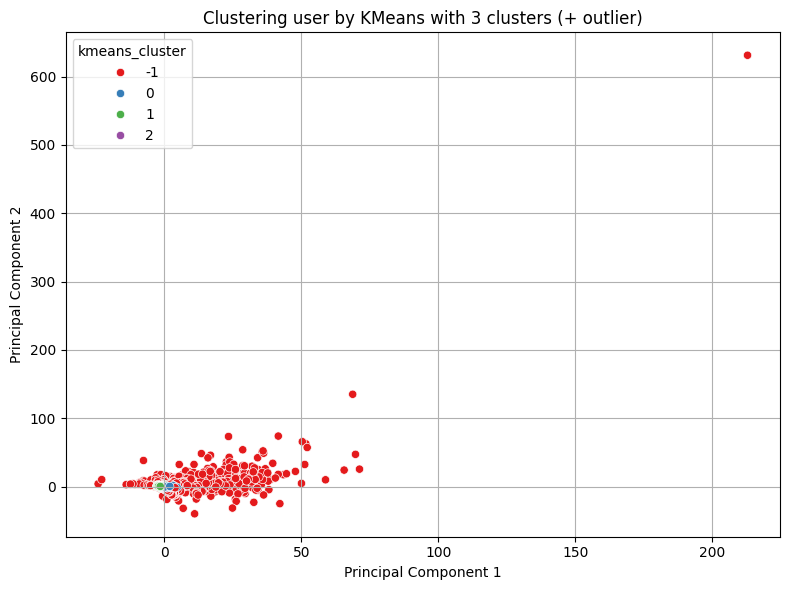

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_login['pca_kmean_1'] = pca_result[:, 0]
df_login['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_login,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
cluster_stats = df_login.groupby('kmeans_cluster')[
    [
       'num_day_login', 'num_session_on_day',
       'avg_between_login', 'streak_login', 
       'last_since_from_login', 'popular_time_login', 
       'gold_std_login', 'diamond_std_login',
       'silkcoin_std_login', 'gold_slope_login', 
       'diamond_slope_login', 'silkcoin_slope_login',
       'powerpoint_last_login', 'level_last_login',
       'vip_last_login'
    ]   
].mean().round(2)

cluster_counts = df_login['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_day_login', ascending=False)
cluster_summary

,num_day_login,num_session_on_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login,num_users,percent_users
kmeans_cluster,,,,,,,,,,,,,,,,,
0,35.41,5.32,0.53,19.58,1.85,11.78,8028661.83,27.25,130.57,117960.67,-0.49,-0.39,4046314.02,46.25,0.27,68468,31.54
-1,32.26,8.03,2.97,24.57,4.71,10.89,62898244.14,111.67,777.75,375157.16,3.63,-2.22,14376106.01,61.00,0.98,12723,5.86
2,28.81,5.25,0.37,19.08,0.71,11.18,7211509.46,219.91,263.09,145070.00,5.61,3.90,2531817.51,50.46,1.62,13151,6.06
1,5.62,3.46,0.63,3.63,18.18,10.01,386912.43,0.65,10.06,24823.04,0.00,0.08,483071.86,19.32,0.03,122730,56.54


In [14]:
# prompt = f"""
# You are given a user segmentation result using clustering. Here is the data:

# {cluster_summary.to_markdown()}

# Please analyze the clusters, highlight user behaviors and suggest actionable insights.
# """

# response = ollama.chat(
#     model='gemma3:4b', 
#     messages=[{'role': 'user', 'content': prompt}]
# )

# display(Markdown(response['message']['content']))

#### **Gaussian Mixture**

In [15]:
gmm = GaussianMixture(n_components=num_cluster, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled[~outlier_mask])
df_login.loc[~outlier_mask, 'gmm_cluster'] = gmm_labels

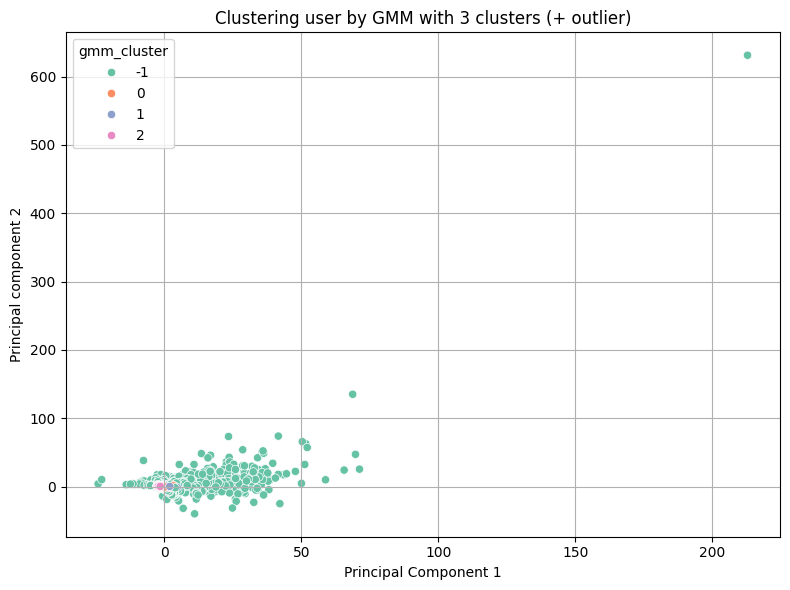

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_login['pca_gmm_1'] = pca_result[:, 0]
df_login['pca_gmm_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_login, x='pca_gmm_1', y='pca_gmm_2', hue='gmm_cluster', palette='Set2')
plt.title(f'Clustering user by GMM with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
cluster_stats = df_login.groupby('gmm_cluster')[
    [
       'num_day_login', 'num_session_on_day',
       'avg_between_login', 'streak_login', 
       'last_since_from_login', 'popular_time_login', 
       'gold_std_login', 'diamond_std_login',
       'silkcoin_std_login', 'gold_slope_login', 
       'diamond_slope_login', 'silkcoin_slope_login',
       'powerpoint_last_login', 'level_last_login',
       'vip_last_login'
    ]   
].mean().round(2)

cluster_counts = df_login['gmm_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_day_login', ascending=False)
cluster_summary

,num_day_login,num_session_on_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login,num_users,percent_users
gmm_cluster,,,,,,,,,,,,,,,,,
1,33.28,5.42,0.49,21.10,3.85,11.49,11209822.05,112.51,269.31,129743.31,0.93,0.71,4976093.91,55.04,0.78,43000,19.81
-1,32.26,8.03,2.97,24.57,4.71,10.89,62898244.14,111.67,777.75,375157.16,3.63,-2.22,14376106.01,61.00,0.98,12723,5.86
0,23.54,4.37,0.76,13.14,8.79,11.04,4712901.61,0.00,46.66,132445.37,-0.00,0.08,3371561.33,44.84,0.26,41597,19.16
2,9.05,3.70,0.55,4.87,15.34,10.26,116622.89,0.00,0.95,16221.74,0.00,0.00,128661.69,16.45,0.00,119752,55.17


#### **Metrics and evaluating**

In [18]:
X_inlier = X_scaled[~outlier_mask]
ch_kmeans = calinski_harabasz_score(X_inlier, df_login.loc[~outlier_mask, 'kmeans_cluster'])
ch_gmm = calinski_harabasz_score(X_inlier, df_login.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")
print(f"GMM Calinski–Harabasz Index: {ch_gmm:.4f}")

KMeans Calinski–Harabasz Index: 47117.4440
GMM Calinski–Harabasz Index: 25686.2421


In [19]:
X_inlier = X_scaled[~outlier_mask]
db_kmeans = davies_bouldin_score(X_inlier, df_login.loc[~outlier_mask, 'kmeans_cluster'])
db_gmm = davies_bouldin_score(X_inlier, df_login.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")
print(f"GMM Davies–Bouldin Index : {db_gmm:.4f}")

KMeans Davies–Bouldin Index: 1.6221
GMM Davies–Bouldin Index : 2.9031


In [20]:
X_inlier = X_scaled[~outlier_mask]
score_kmeans = silhouette_score(X_inlier, df_login.loc[~outlier_mask, 'kmeans_cluster'])
score_gmm = silhouette_score(X_inlier, df_login.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Silhouette score : {score_kmeans:.4f}")
print(f"GMM Silhouette score: {score_gmm:.4f}")

KMeans Silhouette score : 0.2719
GMM Silhouette score: 0.1311


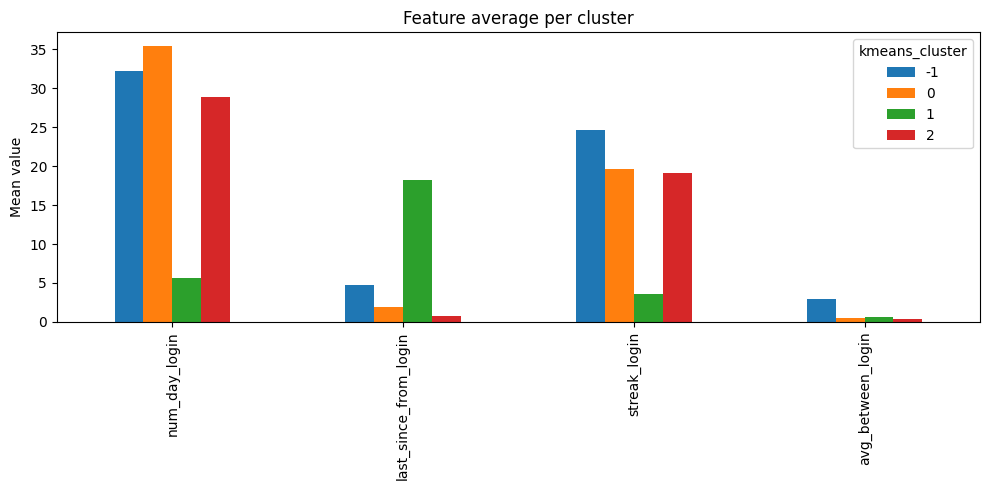

In [21]:
features = [ 'num_day_login', 'last_since_from_login','streak_login','avg_between_login']
df_login.groupby('kmeans_cluster')[features].mean().T.plot.bar(figsize=(10, 5))
plt.title('Feature average per cluster')
plt.ylabel('Mean value')
plt.tight_layout()
plt.show()

## **Purchase**

### **Read & explore data**

In [22]:
df_purchase=pd.read_csv("../EDA_transform/data/purchase_transform.csv")
df_purchase

,vopenid,last_update_time,num_purchase,total_purchase,count_purchase_per_day,std_amount_purchase,max_purchase,days_since_last_purchase,num_product_buyed
0,2206151945395710,2025-06-24 22:46:22.711000+00:00,1,3.99,1.00,0.00,3.99,1,1
1,2206211830166192,2025-05-24 15:48:36.757000+00:00,1,0.79,1.00,0.00,0.79,32,1
2,2208132058338497,2025-06-20 03:06:03.875000+00:00,1,1.99,1.00,0.00,1.99,6,1
3,2210221534402190,2025-05-26 05:14:28.541000+00:00,1,7.88,1.00,0.00,7.88,31,1
4,2210221828089318,2025-06-11 14:06:52.646000+00:00,2,3.98,2.00,0.00,1.99,14,2
...,...,...,...,...,...,...,...,...,...
37254,6210001017824,2025-06-25 03:01:13.202000+00:00,5,17.79,1.25,2.56,7.88,1,3
37255,6210001048809,2025-05-02 05:53:07.510000+00:00,1,1.99,1.00,0.00,1.99,55,1
37256,6210001076576,2025-05-05 18:33:57.853000+00:00,1,1.58,1.00,0.00,1.58,51,1
37257,6220001331202,2025-06-12 14:39:00.448000+00:00,1,1.99,1.00,0.00,1.99,13,1


In [23]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37259 entries, 0 to 37258
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vopenid                   37259 non-null  int64  
 1   last_update_time          37259 non-null  object 
 2   num_purchase              37259 non-null  int64  
 3   total_purchase            37259 non-null  float64
 4   count_purchase_per_day    37259 non-null  float64
 5   std_amount_purchase       37259 non-null  float64
 6   max_purchase              37259 non-null  float64
 7   days_since_last_purchase  37259 non-null  int64  
 8   num_product_buyed         37259 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.6+ MB


In [24]:
df_purchase.describe()

,vopenid,num_purchase,total_purchase,count_purchase_per_day,std_amount_purchase,max_purchase,days_since_last_purchase,num_product_buyed
count,37259.00,37259.00,37259.00,37259.00,37259.00,37259.00,37259.00,37259.00
mean,2475849394504848.00,2.61,27.59,1.41,3.01,13.98,20.44,1.85
std,80398444695406.33,3.49,61.55,0.94,6.65,16.85,15.75,1.40
min,6200000000063.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,2411151935068183.00,1.00,9.96,1.00,0.00,7.88,7.00,1.00
50%,2504022237445411.00,2.00,15.76,1.00,0.00,15.00,15.00,1.00
75%,2505271901570520.00,3.00,23.63,1.50,5.30,15.75,32.00,2.00
max,2506260101126858.00,147.00,3852.06,11.00,196.23,360.00,56.00,19.00


In [25]:
df_purchase['last_update_time'] = pd.to_datetime(df_purchase['last_update_time'], errors='coerce')

### **Visualize data**

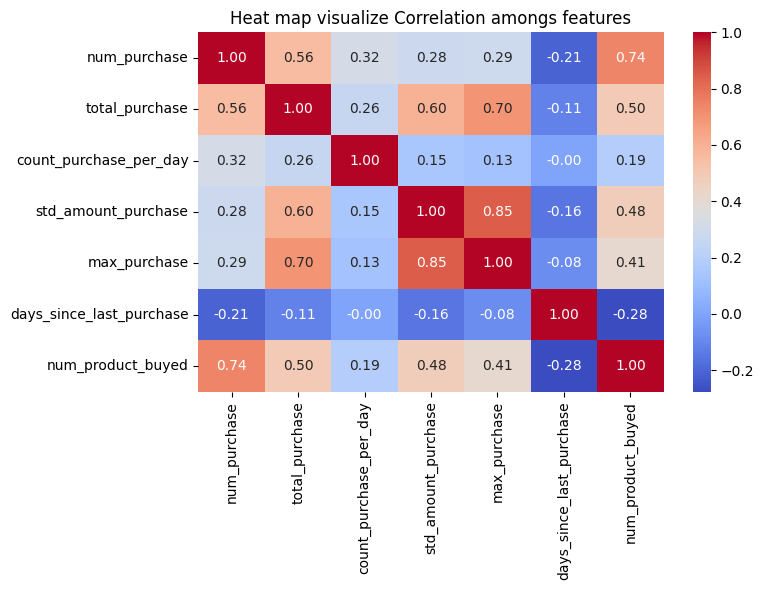

In [26]:
corr_cols = df_purchase.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(8,6))
sns.heatmap(df_purchase[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

In [27]:
X = df_purchase.drop(columns=['vopenid', 'last_update_time'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
z_scores = pd.DataFrame(np.abs(zscore(X_scaled)), columns=X.columns)
outlier_mask = (z_scores > 5).any(axis=1)

In [29]:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# isomap = Isomap(n_components=2)
# X_iso = isomap.fit_transform(X_scaled)

# residual_variance = 1 - np.corrcoef(X_pca.ravel(), X_iso.ravel())[0, 1]**2
# print(f"Residual Variance (Isomap vs PCA): {residual_variance:.4f}")

In [30]:
num_cluster = 3
df_purchase['kmeans_cluster'] = -1
df_purchase['gmm_cluster'] = -1
df_purchase['agglo_cluster'] = -1
df_purchase['spec_cluster'] = -1

#### **Kmeans**

In [31]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled[~outlier_mask])
df_purchase.loc[~outlier_mask, 'kmeans_cluster'] = kmeans_labels

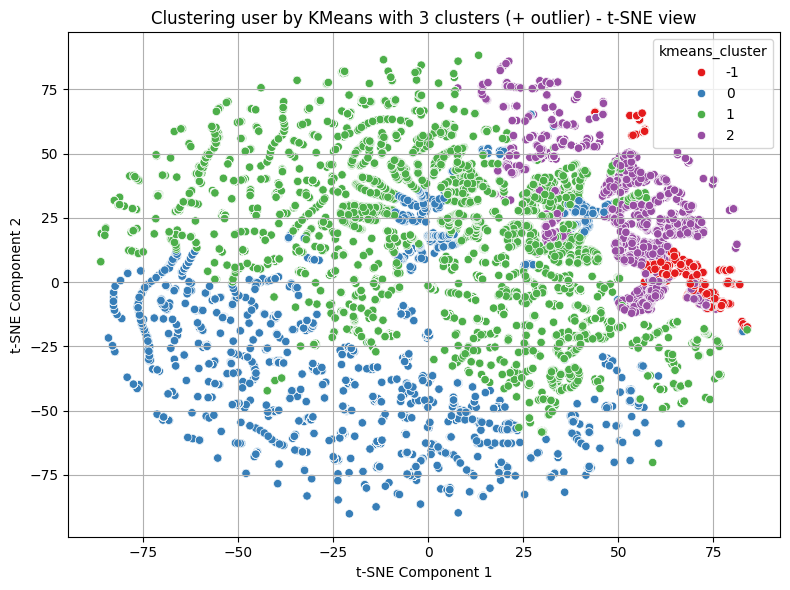

In [32]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

df_purchase['tsne_kmean_1'] = tsne_result[:, 0]
df_purchase['tsne_kmean_2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_purchase,
    x='tsne_kmean_1', y='tsne_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier) - t-SNE view')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

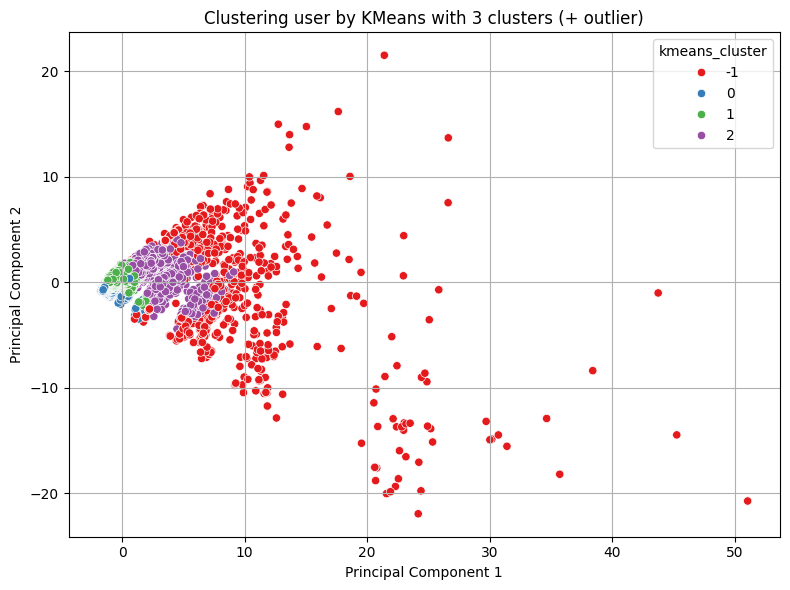

In [33]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_purchase['pca_kmean_1'] = pca_result[:, 0]
df_purchase['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_purchase,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
cluster_stats = df_purchase.groupby('kmeans_cluster')[
    [
        'num_purchase', 'total_purchase',
        'max_purchase',
        'num_product_buyed', 'days_since_last_purchase',
    ]   
].mean()

cluster_counts = df_purchase['kmeans_cluster'].value_counts().rename('num_users')

total_users = cluster_counts.sum()
total_money = cluster_stats['total_purchase'].sum()

cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary['percent_total_purchase'] = (cluster_summary['total_purchase'] / total_money * 100).round(2)

cluster_summary = cluster_summary.sort_values(by='total_purchase', ascending=False)
cluster_summary

,num_purchase,total_purchase,max_purchase,num_product_buyed,days_since_last_purchase,num_users,percent_users,percent_total_purchase
kmeans_cluster,,,,,,,,
-1,15.11,244.55,79.87,6.25,11.80,802,2.15,70.74
2,6.62,67.58,20.08,3.69,14.84,4024,10.80,19.55
1,2.08,19.02,11.49,1.66,10.31,19675,52.81,5.50
0,1.38,14.56,11.77,1.28,38.39,12758,34.24,4.21


In [35]:
gmm = GaussianMixture(n_components=num_cluster, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled[~outlier_mask])
df_purchase.loc[~outlier_mask, 'gmm_cluster'] = gmm_labels

In [36]:
# tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
# tsne_result = tsne.fit_transform(X_scaled)

# df_purchase['tsne_gmm_1'] = tsne_result[:, 0]
# df_purchase['tsne_gmm_2'] = tsne_result[:, 1]

# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=df_purchase,
#     x='tsne_gmm_1', y='tsne_gmm_2',
#     hue='gmm_cluster',
#     palette='Set2'
# )
# plt.title(f'Clustering user by GMM (t-SNE visualization) with {num_cluster} clusters (+ outlier)')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

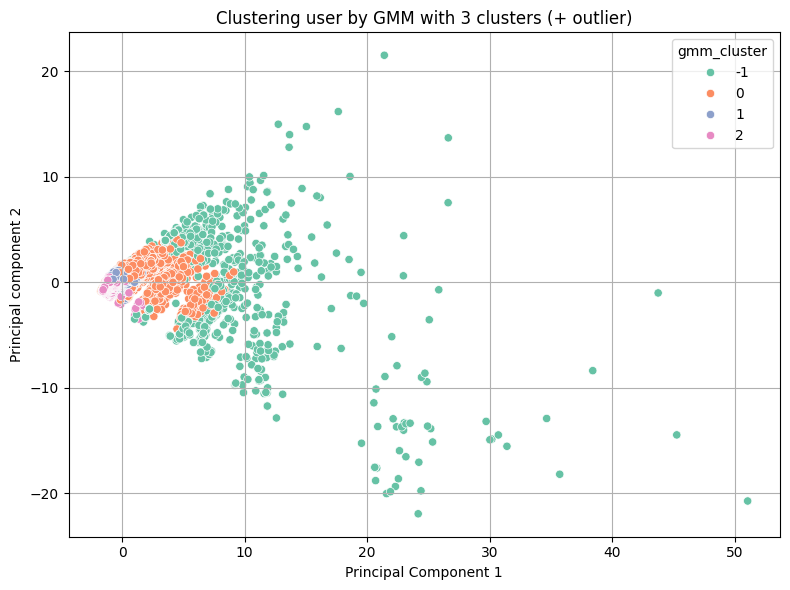

In [37]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_purchase['pca_gmm_1'] = pca_result[:, 0]
df_purchase['pca_gmm_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_purchase, x='pca_gmm_1', y='pca_gmm_2', hue='gmm_cluster', palette='Set2')
plt.title(f'Clustering user by GMM with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df_purchase.columns

Index(['vopenid', 'last_update_time', 'num_purchase', 'total_purchase',
       'count_purchase_per_day', 'std_amount_purchase', 'max_purchase',
       'days_since_last_purchase', 'num_product_buyed', 'kmeans_cluster',
       'gmm_cluster', 'agglo_cluster', 'spec_cluster', 'tsne_kmean_1',
       'tsne_kmean_2', 'pca_kmean_1', 'pca_kmean_2', 'pca_gmm_1', 'pca_gmm_2'],
      dtype='object')

In [39]:
cluster_stats = df_purchase.groupby('gmm_cluster')[
    [
        'num_purchase', 'total_purchase',
        'max_purchase',
        'num_product_buyed', 'days_since_last_purchase',
    ]   
].mean()

cluster_counts = df_purchase['gmm_cluster'].value_counts().rename('num_users')

total_users = cluster_counts.sum()
total_money = cluster_stats['total_purchase'].sum()

cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary['percent_total_purchase'] = (cluster_summary['total_purchase'] / total_money * 100).round(2)

cluster_summary = cluster_summary.sort_values(by='total_purchase', ascending=False)
cluster_summary

,num_purchase,total_purchase,max_purchase,num_product_buyed,days_since_last_purchase,num_users,percent_users,percent_total_purchase
gmm_cluster,,,,,,,,
-1,15.11,244.55,79.87,6.25,11.80,802,2.15,73.11
0,5.70,55.78,17.29,3.16,14.58,6355,17.06,16.68
1,2.43,19.91,10.61,1.82,14.94,8553,22.96,5.95
2,1.31,14.26,11.90,1.31,24.68,21549,57.84,4.26


#### **Metrics Evaluation**

##### **1. Silhouette Score**

- Đánh giá mức độ gắn kết trong cụm và tách biệt giữa các cụm.
- Giá trị nằm trong khoảng `[-1, 1]`
- Gần **1** → điểm nằm gần tâm cụm của nó và xa cụm khác → tốt.
- Gần **0** → điểm nằm gần ranh giới giữa hai cụm.
- `< 0` → điểm có thể bị gán sai cụm.

**Công thức:**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Trong đó:
- `a(i)` là khoảng cách trung bình từ điểm `i` đến các điểm khác trong cùng cụm.
- `b(i)` là khoảng cách trung bình từ điểm `i` đến các điểm ở cụm gần nhất khác.

##### **2. Davies–Bouldin Index (DBI)**

- Đo độ tương tự giữa các cụm (càng nhỏ càng tốt).
- DBI càng **thấp** → các cụm càng riêng biệt, càng gọn.
- DBI ≥ 0, không có giới hạn trên.

**Công thức:**

$$
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

Trong đó:
- `s_i` là độ phân tán trong cụm `i`
- `d_ij` là khoảng cách giữa hai tâm cụm `i` và `j`

##### **3. Calinski–Harabasz Index (CHI)**

- Đo tỷ lệ giữa độ phân tán giữa cụm và trong cụm (càng lớn càng tốt).

**Công thức:**

$$
CHI = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{N - k}{k - 1}
$$

Trong đó:
- `Tr(B_k)` là tổng phương sai giữa các cụm
- `Tr(W_k)` là tổng phương sai trong cụm
- `N` là số điểm dữ liệu
- `k` là số cụm

In [40]:
X_inlier = X_scaled[~outlier_mask]
score_kmeans = silhouette_score(X_inlier, df_purchase.loc[~outlier_mask, 'kmeans_cluster'])
score_gmm = silhouette_score(X_inlier, df_purchase.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Silhouette score : {score_kmeans:.4f}")
print(f"GMM Silhouette score: {score_gmm:.4f}")

KMeans Silhouette score : 0.3521
GMM Silhouette score: 0.0440


In [41]:
X_inlier = X_scaled[~outlier_mask]
db_kmeans = davies_bouldin_score(X_inlier, df_purchase.loc[~outlier_mask, 'kmeans_cluster'])
db_gmm = davies_bouldin_score(X_inlier, df_purchase.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")
print(f"GMM Davies–Bouldin Index : {db_gmm:.4f}")

KMeans Davies–Bouldin Index: 1.2558
GMM Davies–Bouldin Index : 2.4417


In [42]:
X_inlier = X_scaled[~outlier_mask]
ch_kmeans = calinski_harabasz_score(X_inlier, df_purchase.loc[~outlier_mask, 'kmeans_cluster'])
ch_gmm = calinski_harabasz_score(X_inlier, df_purchase.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")
print(f"GMM Calinski–Harabasz Index: {ch_gmm:.4f}")

KMeans Calinski–Harabasz Index: 15244.6651
GMM Calinski–Harabasz Index: 6159.2906


## **Equipenhance**

### **Read & explore data**

In [43]:
df_equip=pd.read_csv("../EDA_transform/data/equipenhance_transform.csv")
df_equip

,vopenid,last_update_time,num_enhance,enhance_success_rate,max_enhance_level
0,2206111808105074,2025-06-15 14:53:06+00:00,2,1.00,2
1,2206111830413361,2025-06-16 06:01:59+00:00,79,0.65,7
2,2206112142566650,2025-06-17 03:34:01+00:00,14,0.79,2
3,2206131428405180,2025-06-13 03:56:37+00:00,1,1.00,1
4,2206141543270674,2025-06-10 14:35:30+00:00,2,0.00,0
...,...,...,...,...,...
55133,6220001341173,2025-06-08 06:12:13+00:00,4,0.75,2
55134,6220001406323,2025-06-17 14:14:40+00:00,5,0.40,1
55135,6220001449993,2025-06-13 07:30:53+00:00,4,0.75,2
55136,chungminhde,2025-06-18 11:14:52+00:00,16,0.69,5


In [44]:
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55138 entries, 0 to 55137
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vopenid               55138 non-null  object 
 1   last_update_time      55138 non-null  object 
 2   num_enhance           55138 non-null  int64  
 3   enhance_success_rate  55138 non-null  float64
 4   max_enhance_level     55138 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [45]:
df_equip.describe()

,num_enhance,enhance_success_rate,max_enhance_level
count,55138.00,55138.00,55138.00
mean,123.71,0.72,4.11
std,246.97,0.20,2.24
min,1.00,0.00,-1.00
25%,8.00,0.61,2.00
50%,32.00,0.71,4.00
75%,138.00,0.85,6.00
max,12899.00,1.00,16.00


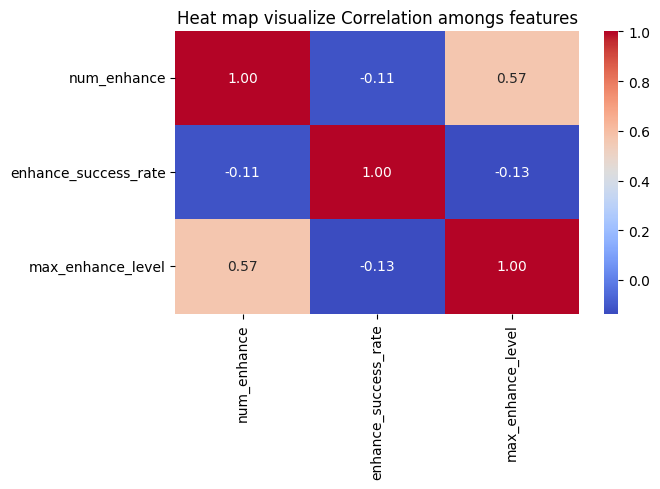

In [46]:
corr_cols = df_equip.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(7,5))
sns.heatmap(df_equip[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

In [47]:
X = df_equip.drop(columns=['vopenid', 'last_update_time'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
z_scores = pd.DataFrame(np.abs(zscore(X_scaled)), columns=X.columns)
outlier_mask = (z_scores > 5).any(axis=1)

In [49]:
num_cluster = 3
df_equip['kmeans_cluster'] = -1
df_equip['gmm_cluster'] = -1

#### **Kmeans**

In [50]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled[~outlier_mask])
df_equip.loc[~outlier_mask, 'kmeans_cluster'] = kmeans_labels

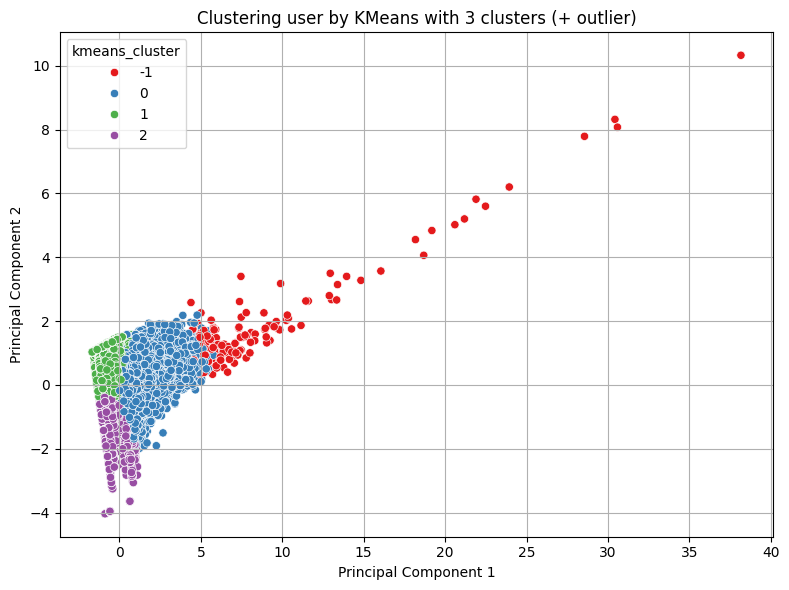

In [51]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_equip['pca_kmean_1'] = pca_result[:, 0]
df_equip['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
df_equip

,vopenid,last_update_time,num_enhance,enhance_success_rate,max_enhance_level,kmeans_cluster,gmm_cluster,pca_kmean_1,pca_kmean_2
0,2206111808105074,2025-06-15 14:53:06+00:00,2,1.00,2,1,-1,-1.37,1.11
1,2206111830413361,2025-06-16 06:01:59+00:00,79,0.65,7,0,-1,0.86,-0.17
2,2206112142566650,2025-06-17 03:34:01+00:00,14,0.79,2,1,-1,-1.04,0.07
3,2206131428405180,2025-06-13 03:56:37+00:00,1,1.00,1,1,-1,-1.68,1.03
4,2206141543270674,2025-06-10 14:35:30+00:00,2,0.00,0,2,-1,-0.58,-3.96
...,...,...,...,...,...,...,...,...,...
55133,6220001341173,2025-06-08 06:12:13+00:00,4,0.75,2,1,-1,-1.01,-0.12
55134,6220001406323,2025-06-17 14:14:40+00:00,5,0.40,1,2,-1,-0.83,-1.91
55135,6220001449993,2025-06-13 07:30:53+00:00,4,0.75,2,1,-1,-1.01,-0.12
55136,chungminhde,2025-06-18 11:14:52+00:00,16,0.69,5,0,-1,0.02,-0.18


In [53]:
cluster_stats = df_equip.groupby('kmeans_cluster')[
    [
       'num_enhance', 'enhance_success_rate',
       'max_enhance_level',
    ]   
].mean().round(2)

cluster_counts = df_equip['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_enhance', ascending=False)
cluster_summary

,num_enhance,enhance_success_rate,max_enhance_level,num_users,percent_users
kmeans_cluster,,,,,
-1,2425.82,0.59,9.99,155,0.28
0,271.99,0.65,6.43,19705,35.74
1,35.12,0.87,3.03,24578,44.58
2,20.76,0.49,2.24,10700,19.41


#### **Gaussian Mixture**

In [54]:
gmm = GaussianMixture(n_components=num_cluster, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled[~outlier_mask])
df_equip.loc[~outlier_mask, 'gmm_cluster'] = gmm_labels

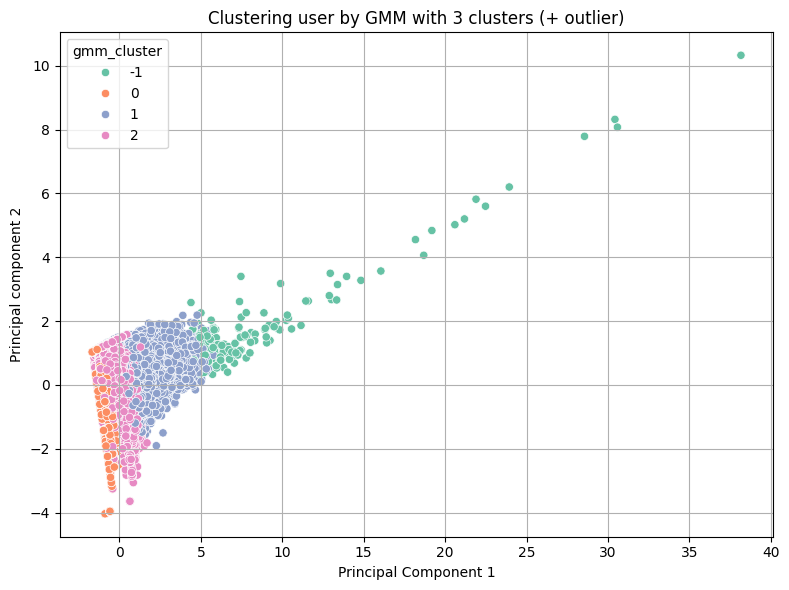

In [55]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_equip['pca_gmm_1'] = pca_result[:, 0]
df_equip['pca_gmm_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_equip, x='pca_gmm_1', y='pca_gmm_2', hue='gmm_cluster', palette='Set2')
plt.title(f'Clustering user by GMM with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
cluster_stats = df_equip.groupby('gmm_cluster')[
    [
       'num_enhance', 'enhance_success_rate',
       'max_enhance_level',
    ]   
].mean().round(2)

cluster_counts = df_equip['gmm_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_enhance', ascending=False)
cluster_summary

,num_enhance,enhance_success_rate,max_enhance_level,num_users,percent_users
gmm_cluster,,,,,
-1,2425.82,0.59,9.99,155,0.28
1,323.53,0.69,6.17,17289,31.36
2,34.57,0.72,4.10,22909,41.55
0,4.01,0.76,1.65,14785,26.81


#### **Metrics and evaluating**

In [57]:
X_inlier = X_scaled[~outlier_mask]
ch_kmeans = calinski_harabasz_score(X_inlier, df_equip.loc[~outlier_mask, 'kmeans_cluster'])
ch_gmm = calinski_harabasz_score(X_inlier, df_equip.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")
print(f"GMM Calinski–Harabasz Index: {ch_gmm:.4f}")

KMeans Calinski–Harabasz Index: 33439.6237
GMM Calinski–Harabasz Index: 15531.4442


In [58]:
X_inlier = X_scaled[~outlier_mask]
db_kmeans = davies_bouldin_score(X_inlier, df_equip.loc[~outlier_mask, 'kmeans_cluster'])
db_gmm = davies_bouldin_score(X_inlier, df_equip.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")
print(f"GMM Davies–Bouldin Index : {db_gmm:.4f}")

KMeans Davies–Bouldin Index: 0.9181
GMM Davies–Bouldin Index : 1.7659


In [59]:
X_inlier = X_scaled[~outlier_mask]
score_kmeans = silhouette_score(X_inlier, df_equip.loc[~outlier_mask, 'kmeans_cluster'])
score_gmm = silhouette_score(X_inlier, df_equip.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Silhouette score : {score_kmeans:.4f}")
print(f"GMM Silhouette score: {score_gmm:.4f}")

KMeans Silhouette score : 0.3717
GMM Silhouette score: 0.1686


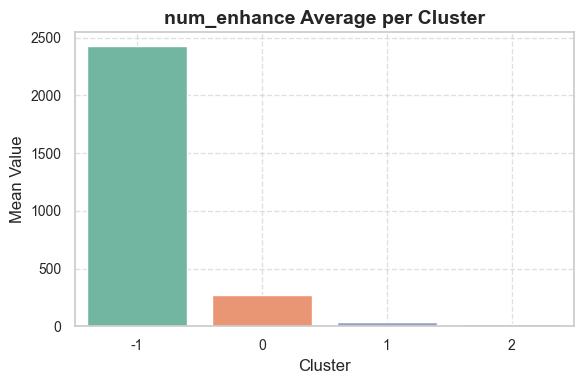

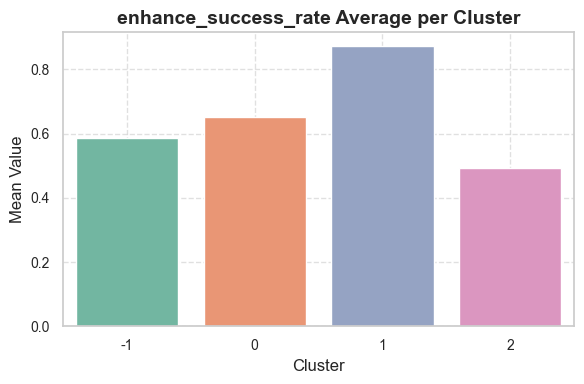

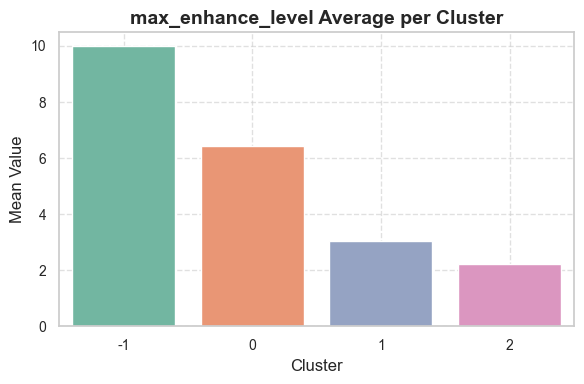

In [60]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")  

features = ['num_enhance', 'enhance_success_rate', 'max_enhance_level']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=df_equip['kmeans_cluster'],
        y=df_equip[feature],
        estimator='mean',
        palette=palette,
        errorbar=None  
    )
    plt.title(f'{feature} Average per Cluster', fontsize=14, weight='bold')
    plt.ylabel('Mean Value', fontsize=12)
    plt.xlabel('Cluster', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [61]:
import ollama
from IPython.display import Markdown, display

prompt = """
You are given a user segmentation result using clustering, presented in the table below. Before analyzing, please understand the meaning of each feature:

- `num_enhance`: the average number of enhancement attempts per user in the cluster. "Enhancing" is a core game mechanic, and this feature reflects how actively users engage with it.
- `enhance_success_rate`: the overall success ratio of enhancement attempts. Due to the probabilistic nature of enhancing (e.g. 50% success rate at higher levels), users with more enhancement attempts naturally converge toward a ~0.5 success rate.
- `max_enhance_level`: the highest enhancement level users in the cluster have reached. Higher levels are much harder to reach.
- `num_users`: the number of users in the cluster.
- `percent_users`: percentage of all users that belong to the cluster.

Here is the data:

| Cluster | num_enhance | enhance_success_rate | max_enhance_level | num_users | percent_users |
|---------|--------------|----------------------|-------------------|-----------|----------------|
| -1      | 2425.82      | 0.59                 | 9.99              | 155       | 0.28%          |
| 0       | 271.99       | 0.65                 | 6.43              | 19705     | 35.74%         |
| 1       | 35.12        | 0.87                 | 3.03              | 24578     | 44.58%         |
| 2       | 20.76        | 0.49                 | 2.24              | 10700     | 19.41%         |

Please analyze the behavior of each cluster based on this understanding. Describe user characteristics, behavioral insights, and strategic opportunities. Avoid misinterpreting natural statistical effects (e.g. success rate being close to 0.5 due to large sample size). Present your analysis in a professional and structured tone.
"""

response = ollama.chat(
    model='gemma3:4b', 
    messages=[{'role': 'user', 'content': prompt}]
)

print(response['message']['content'])
display(Markdown(response['message']['content']))

Okay, here’s an analysis of the user segmentation data, focusing on actionable insights derived from the cluster characteristics.

**Executive Summary:**

This analysis reveals distinct user segments within the game, primarily differentiated by engagement with the core "enhance" mechanic. We identify three distinct clusters exhibiting significantly different behaviors – a small, highly engaged core group, a large, moderately engaged group, and a smaller, highly successful enhancement group. These differences present valuable strategic opportunities to tailor content, rewards, and communication to each segment.

**Cluster Breakdown & Insights:**

**Cluster -1: The “Dedicated Core” (Low Volume, High Intensity)**

* **Characteristics:** This cluster represents a tiny fraction (0.28%) of the total user base, yet possesses the most intense engagement with the “enhance” mechanic (2425.82 attempts). Despite this high frequency, their success rate is relatively low (59%) and they only reach a 

Okay, here’s an analysis of the user segmentation data, focusing on actionable insights derived from the cluster characteristics.

**Executive Summary:**

This analysis reveals distinct user segments within the game, primarily differentiated by engagement with the core "enhance" mechanic. We identify three distinct clusters exhibiting significantly different behaviors – a small, highly engaged core group, a large, moderately engaged group, and a smaller, highly successful enhancement group. These differences present valuable strategic opportunities to tailor content, rewards, and communication to each segment.

**Cluster Breakdown & Insights:**

**Cluster -1: The “Dedicated Core” (Low Volume, High Intensity)**

* **Characteristics:** This cluster represents a tiny fraction (0.28%) of the total user base, yet possesses the most intense engagement with the “enhance” mechanic (2425.82 attempts). Despite this high frequency, their success rate is relatively low (59%) and they only reach a moderate enhancement level (9.99).
* **Behavioral Insights:** These users are likely the most dedicated fans of the game, perhaps early adopters or those who prioritize progression through enhancement. They might be frustrated by the difficulty of reaching higher levels or feel a strong competitive drive linked to enhancement levels.  They might be resistant to changes that could potentially impact their ability to enhance.
* **Strategic Opportunities:**
    * **Exclusive Rewards:** Offer exclusive cosmetic items, early access to new content, or unique enhancement boosts specifically tied to this cluster. Recognizing their engagement with a ‘thank you’ gesture could foster loyalty.
    * **Personalized Content:**  Deliver content and challenges tailored to the strategic aspects of maximizing their enhancement success, acknowledging their drive to push the limits.
    * **Community Focus:**  Create a dedicated forum or community space where they can share strategies and discuss high-level enhancement challenges.



**Cluster 0: The “Balanced Engagement” (High Volume, Moderate Success)**

* **Characteristics:** This constitutes the largest segment of the user base (35.74%) with a high volume of enhancement attempts (271.99) and a respectable success rate (65%). They reach a relatively high average enhancement level (6.43).
* **Behavioral Insights:** This group represents the bulk of the player base, actively participating in the core mechanic but not necessarily at the extremes. Their moderate success rate suggests a comfortable level of engagement – they enjoy enhancing but aren't driven to the same extent as Cluster 1.
* **Strategic Opportunities:**
    * **Content Scaling:** Introduce new enhancement options and challenges that cater to a range of difficulty levels, appealing to this group’s enjoyment of the core mechanic.
    * **Community Events:**  Organize group enhancement events, providing a shared experience and potential rewards for participation.
    * **Targeted Promotions:** Leverage this segment for promoting new content or features, as their overall engagement provides a large potential audience.



**Cluster 1: The “High Success” (Low Volume, High Success)**

* **Characteristics:** This cluster (44.58% of users) exhibits the lowest volume of enhancement attempts (35.12) but achieves the highest success rate (87%) and reaches a surprisingly high level (3.03).
* **Behavioral Insights:** This segment represents a key anomaly. Their low volume suggests a more strategic and efficient approach to enhancement.  The high success rate and maximum level achieved indicate a focused effort on maximizing efficiency, possibly utilizing specific strategies or a deep understanding of the enhancement system. They are likely *optimizing* the enhancement system rather than just ‘doing’ it.
* **Strategic Opportunities:**
    * **Case Study Content:**  Create content highlighting their strategies and successful approaches to enhancement, acting as a “best practices” resource.
    * **Advanced Tutorials:** Develop advanced tutorials specifically targeting efficiency and optimization techniques.
    * **Exclusive Community Access:** Provide access to beta testing or early access to new content, recognizing their strategic insights.
    * **Reward Strategic Thinking:** Provide incentives for sharing their optimization strategies within the community.

**Overall Recommendations:**

* **Segmented Communication:**  Tailor communication and messaging to each cluster, addressing their specific needs and motivations.
* **A/B Testing:**  Conduct A/B testing of different features, rewards, and content to understand which resonate best with each segment.
* **Data Monitoring:**  Continuously monitor cluster behavior to detect shifts in engagement and adapt strategies accordingly.

By understanding and responding to the distinct characteristics of these user clusters, the game developers can significantly improve user engagement, retention, and ultimately, the overall success of the game. 

---

Do you want me to delve deeper into a specific aspect of this analysis, such as suggesting specific reward structures for each cluster, or exploring how these segments might interact with each other?

In [62]:
# import ollama

# prompt = """
# You are given a user segmentation result using clustering, presented in the table below. Before analyzing, please understand the meaning of each feature:

# - `num_enhance`: the average number of enhancement attempts per user in the cluster. "Enhancing" is a core game mechanic, and this feature reflects how actively users engage with it.
# - `enhance_success_rate`: the overall success ratio of enhancement attempts. Due to the probabilistic nature of enhancing (e.g. 50% success rate at higher levels), users with more enhancement attempts naturally converge toward a ~0.5 success rate.
# - `max_enhance_level`: the highest enhancement level users in the cluster have reached. Higher levels are much harder to reach.
# - `num_users`: the number of users in the cluster.
# - `percent_users`: percentage of all users that belong to the cluster.

# Here is the data:

# | Cluster | num_enhance | enhance_success_rate | max_enhance_level | num_users | percent_users |
# |---------|--------------|----------------------|-------------------|-----------|----------------|
# | -1      | 2425.82      | 0.59                 | 9.99              | 155       | 0.28%          |
# | 0       | 271.99       | 0.65                 | 6.43              | 19705     | 35.74%         |
# | 1       | 35.12        | 0.87                 | 3.03              | 24578     | 44.58%         |
# | 2       | 20.76        | 0.49                 | 2.24              | 10700     | 19.41%         |

# Please analyze the behavior of each cluster based on this understanding. Describe user characteristics, behavioral insights, and strategic opportunities. Avoid misinterpreting natural statistical effects (e.g. success rate being close to 0.5 due to large sample size). Present your analysis in a professional and structured tone.
# """

# response = ollama.chat(
#     model='gemma3:12b', 
#     messages=[{'role': 'user', 'content': prompt}]
# )

# print(response['message']['content'])



Prompt design:
def generate_prompts(clustered_res):
    prompt = "You are a senior game data scientist. Based on the following clustering results, generate a detailed analysis of each cluster:\n"
    prompt += "Each cluster is described by the average values of key metrics. Provide insights into player behavior and characteristics for each cluster.\n\n"
    prompt += "Here are the clusters:\n"
    for index, row in clustered_res.iterrows():
        prompt += f"Cluster {row['cluster']}:\n"
        prompt +=    f"Average Total Money Player paid for game: {row['total_purchase']:.2f}\n"
        prompt +=    f"Average Top-up Frequency: {row['purchase_frequency']:.2f}\n"
        prompt +=   f"Average Days Since Last Top-up: {row['days_since_last_purchase']:.2f}\n"
        prompt +=    f"Average Streak Login: {row['streak_login']:.2f}\n"  
        prompt +=    f"Average Number of Logins: {row['num_login']:.2f}\n" 
        prompt +=    f"Portion of Users in Cluster: {row['proportion']:.2%}\n"
    prompt += "\nPlease provide a detailed analysis of each cluster, including player behavior, potential strategies for engagement, and any other relevant insights.\n"
    return prompt

Output of RFM + Engagement:
As a senior game data scientist, these clustering results provide incredibly valuable insights into our player base. Understanding these distinct segments allows us to tailor our strategies more effectively, optimizing for both engagement and monetization.

Let's break down each cluster in detail:

---

### **Cluster 0: The "Whales" / High-Value Loyalists**

*   **Average Total Money Player paid for game:** **$134.16** (Extremely high)
*   **Average Top-up Frequency:** **2.82** (Highest)
*   **Average Days Since Last Top-up:** **9.76** (Very low, indicating recent activity)
*   **Average Streak Login:** **19.08** (Very high)
*   **Average Number of Logins:** **350.35** (Extremely high)
*   **Portion of Users in Cluster:** **0.38%** (Very small)

**Analysis:**
This is our most valuable, albeit smallest, player segment. These are the "Whales" or "Super-Spenders." They contribute an overwhelmingly disproportionate amount of revenue to the game. Their high login frequency and streak, combined with exceptionally high spending and top-up frequency, indicate deep engagement, loyalty, and a strong affinity for the game. They are actively playing and consistently making purchases. The low "Days Since Last Top-up" confirms their current active status as paying players.

**Player Behavior & Characteristics:**
*   **Elite Spenders:** They are willing to invest heavily in the game, likely for progression, cosmetic items, power advantages, or exclusive content.
*   **Highly Engaged & Dedicated:** Their massive number of logins and impressive streak login suggest they are deeply committed, likely playing daily and for extended periods.
*   **Content Consumers:** They are likely consuming a lot of in-game content, participating in events, and pushing towards end-game goals.
*   **Status Seekers/Collectors:** May be motivated by obtaining rare items, climbing leaderboards, or achieving VIP status.

**Potential Strategies:**
1.  **VIP Program & Personalized Service:** Implement or enhance a robust VIP program with exclusive benefits (e.g., dedicated customer support, early access to new content/features, unique cosmetics, special in-game recognition).
2.  **High-End Content & Offers:** Develop premium, high-value bundles, limited-time offers, or new content tiers specifically for this segment. Focus on prestige, power, or unique experiences.
3.  **Retention & Churn Prevention:** Monitor these players very closely. Any slight increase in "Days Since Last Top-up" or drop in "Streak Login" should trigger proactive personalized outreach (e.g., exclusive offers, personal messages from customer service).
4.  **Feedback & Co-creation:** Engage them in beta tests, focus groups, or dedicated feedback channels. Their insights are invaluable for game development and future monetization strategies.
5.  **Exclusive Events:** Host special in-game or even real-world events just for VIPs to foster a sense of community and exclusivity.

---

### **Cluster 1: The "Churned" / Early Drop-offs / Free Riders**

*   **Average Total Money Player paid for game:** **$0.08** (Effectively zero)
*   **Average Top-up Frequency:** **0.01** (Effectively zero)
*   **Average Days Since Last Top-up:** **0.02** (Likely indicates never topped up, or topped up insignificantly long ago)
*   **Average Streak Login:** **3.23** (Very low)
*   **Average Number of Logins:** **20.92** (Very low)
*   **Portion of Users in Cluster:** **68.43%** (Largest cluster by far)

**Analysis:**
This cluster represents the vast majority of our player base. Given their extremely low login counts, non-existent spending, and short login streaks, these are likely:
    1.  **Early Churners:** Players who downloaded the game, tried it out for a very short period, and then left.
    2.  **Highly Casual/Infrequent Players:** Those who log in once in a while but don't stick around.
    3.  **Pure Free Riders:** Users who engage minimally without any intention of spending.

**Player Behavior & Characteristics:**
*   **Low Commitment:** They haven't found enough compelling reasons to engage deeply or make the game a habit.
*   **Trial Phase:** Many are still in the initial "try-out" phase of the game.
*   **Easily Dissuaded:** Minor friction points (e.g., confusing tutorial, difficulty spike, lack of immediate gratification) can lead to churn.
*   **Not Monetized:** They haven't seen enough value or reason to make any purchase.

**Potential Strategies:**
1.  **Onboarding Optimization:** This is crucial. Streamline the early game experience, provide clear tutorials, fast progression, and immediate rewards to hook new players.
2.  **First Purchase Conversion Offers:** Introduce highly compelling, low-cost "beginner packs" or "first-purchase bonuses" designed to encourage their initial transaction and break the "no-spending" barrier.
3.  **Re-engagement Campaigns:** For those showing signs of lapsing after their initial few days, implement targeted push notifications or email campaigns highlighting new content, events, or unique offers.
4.  **Content Discovery:** Ensure new players are exposed to the game's core loops, social features, and appealing late-game content early on to showcase the long-term value.
5.  **Reduce Friction:** Identify and eliminate any early-game friction points that might be leading to such high churn rates.

---

### **Cluster 2: The "Engaged Free Players" / Loyal Grinders**

*   **Average Total Money Player paid for game:** **$0.39** (Effectively zero)
*   **Average Top-up Frequency:** **0.03** (Effectively zero)
*   **Average Days Since Last Top-up:** **0.06** (Similar to Cluster 1 – never topped up or irrelevant)
*   **Average Streak Login:** **21.54** (Surprisingly very high, even higher than Cluster 0)
*   **Average Number of Logins:** **165.83** (High)
*   **Portion of Users in Cluster:** **18.93%** (Significant)

**Analysis:**
This is a fascinating and critical segment. These players are highly engaged and loyal, logging in frequently and maintaining impressive streaks, but they almost never spend money. They love the game enough to dedicate significant time but are either unwilling or unable to make purchases. They are the backbone of your active free-to-play community.

**Player Behavior & Characteristics:**
*   **Dedicated & Time-Rich:** They are willing to invest significant time to progress, likely grinding for resources that others might buy.
*   **Value-Conscious/Price Sensitive:** They might not see the value in current monetization offers, or are simply not accustomed to spending on digital goods.
*   **Deep Game Knowledge:** Given their high engagement, they likely understand game mechanics deeply.
*   **Community Builders:** Often active in guilds, chat, or forums, contributing to the game's social fabric.

**Potential Strategies:**
1.  **Conversion Offers:** Focus on creating monetization offers that resonate with players who value time or convenience. Small, high-value bundles (e.g., "skip-the-grind" boosts, double XP for a limited time, or energy packs) can be effective.
2.  **"Try Before You Buy" Models:** Offer temporary access to premium features or items to show their value, potentially converting some to payers.
3.  **Monetization of Convenience:** Since they grind, offer micro-transactions that reduce grind time, not necessarily power.
4.  **Battle Passes/Seasonal Passes:** These can be very effective as they offer significant perceived value over time for a relatively low upfront cost, often converting non-payers into paying users.
5.  **Gated Content (Softly):** Design content that is achievable through grinding but significantly faster or more convenient with a small purchase.
6.  **Community Monetization:** Introduce cosmetic items or social features that could encourage spending without affecting power balance (e.g., unique emotes, profile decorations, guild customizations).

---

### **Cluster 3: The "Dolphins" / Mid-Tier Spenders**

*   **Average Total Money Player paid for game:** **$16.13** (Significant but not extreme)
*   **Average Top-up Frequency:** **1.26** (Moderate)
*   **Average Days Since Last Top-up:** **14.86** (Highest, but still indicates relatively recent payment)
*   **Average Streak Login:** **21.21** (High)
*   **Average Number of Logins:** **149.19** (Moderate/High)
*   **Portion of Users in Cluster:** **12.26%** (Sizable)

**Analysis:**
This cluster represents our "Dolphins" – regular, consistent payers who contribute meaningfully to overall revenue, even if individually they don't match the "whales." They are quite engaged and form a solid base of paying customers. Their login streak and number of logins show good retention. The "Days Since Last Top-up" is the highest, suggesting they might pay less frequently than whales, or there might be slightly longer gaps between their purchases, but they are still actively spending.

**Player Behavior & Characteristics:**
*   **Consistent Value-Seekers:** They are willing to spend for specific items, progression, or convenience, but likely look for good value.
*   **Moderately Invested:** They are committed to the game and see value in their purchases.
*   **Responsive to Offers:** Likely respond well to mid-tier bundles, battle passes, or event-specific purchase opportunities.
*   **Potential to Upsell:** Some might be convinced to spend more if the right incentives are presented.

**Potential Strategies:**
1.  **Upselling & Cross-selling:** Introduce slightly higher-value bundles that offer a better "value per dollar" than what they typically buy. Recommend items based on their past purchases and in-game activity.
2.  **Tiered Rewards & Loyalty Programs:** Offer small bonuses or escalating rewards for consistent spending, encouraging them to maintain their payment patterns.
3.  **Subscription Models:** Explore options like monthly subscriptions or battle passes that offer ongoing value and encourage recurring revenue.
4.  **Targeted Events & Bundles:** Create limited-time events with specific bundles or items that align with their likely motivations for spending (e.g., character upgrades, cosmetic bundles, resource packs).
5.  **Churn Prevention:** Monitor their "Days Since Last Top-up." If it extends significantly, a personalized offer or reminder could re-engage them into spending.

---

### **Overall Strategic Implications & Next Steps:**

*   **80/20 Rule in Play:** Cluster 0, despite being tiny, likely accounts for a disproportionate amount of revenue. Protecting and nurturing this segment is paramount.
*   **Monetization Pyramid:** We have a clear monetization pyramid:
    *   **Peak (Whales):** Cluster 0 - Nurture and retain.
    *   **Mid-Tier (Dolphins):** Cluster 3 - Optimize for LTV and potential upsell.
    *   **Engaged F2P:** Cluster 2 - Focus on conversion, without alienating them. They are a large, engaged audience.
    *   **Base (Churned/Free Riders):** Cluster 1 - Focus on onboarding, initial retention, and early conversion.
*   **Prioritization:** While the largest group (Cluster 1) is tempting, the highest ROI strategies might lie in maximizing the lifetime value of Cluster 0 and Cluster 3, and converting a small percentage of Cluster 2. Improving Cluster 1's onboarding is a long-term game health initiative.
*   **A/B Testing:** Design targeted in-game offers and marketing campaigns for each cluster based on these insights and rigorously A/B test their effectiveness.
*   **Dynamic Personalization:** Leverage these clusters to dynamically adjust in-game offers, notifications, and even content recommendations for individual players.
*   **Deep Dive:** For each cluster, consider further segmentation. For example, within Cluster 2, are there sub-groups based on how long they've played without spending, or specific features they engage with?

This segmentation provides a powerful framework for understanding our player base and crafting data-driven strategies to improve both engagement and monetization across the board.